# Data Science QUESTION 2

  
You'll be asked to do some analysis and modeling tasks on a dataset created.  
The dataset concerns a video gaming company that has information on its customers and would like to gain more insights on what drives their customers to play for longer hours.  

The following tables are provided:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_districts_house_prices = pd.read_csv("df_districts_house_prices.csv")
df_person_data = pd.read_csv("df_person_data.csv")
df_person_district = pd.read_csv("df_person_district.csv")

df_person_district

includes information about each customer (person) and the district they live in

- person_id: the person id
- district: the name of the district

In [ ]:
df_person_district

,person_id,district
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone
1,16f3bafb-9556-434e-adab-cb02f41fe32a,Tashnerspool
2,0fa17eee-7214-4609-97fe-dd3093601800,Tashnerspool
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,Ulven
4,51fed64a-375e-417f-94e4-4d27c368ea44,Red Onvey
...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,Bluffssel
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,Highnantmar
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,Tashnerspool
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,Highnantmar


df_districts_house_prices

includes information about each district and the prices of the houses in the district

- district: the name of the district
- house_price: the price of the house
- house_number: the house number in the district

In [ ]:
df_districts_house_prices

,district,house_price,house_number
0,Celowsgan,160652.0,1
1,Celowsgan,159219.0,2
2,Celowsgan,161543.0,3
3,Celowsgan,158944.0,4
4,Celowsgan,164121.0,5
...,...,...,...
1358,El Willong,932441.0,30
1359,El Willong,890190.0,31
1360,El Willong,892096.0,32
1361,El Willong,935117.0,33


df_person_data

includes personal information about each of the customers and relevant information to their video gaming habits

- person_id: identifier for a person
- age: the age of the person
- n_kids: the number of kids this person has
- n_vg: the number of video games the person owns
- n_con: the number of video game consols the person owns
- n_presub: the number of premium subscription the person owns
- n_hours_playing: the total number of hours this person play per month 

In [ ]:
df_person_data

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745
1,16f3bafb-9556-434e-adab-cb02f41fe32a,18.0,0,2,0,0,20.693273
2,0fa17eee-7214-4609-97fe-dd3093601800,28.0,0,3,0,0,22.412490
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,20.0,1,72,0,0,299.187025
4,51fed64a-375e-417f-94e4-4d27c368ea44,32.0,1,58,1,3,20.367141
...,...,...,...,...,...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,32.0,4,62,1,2,21.378288
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,36.0,0,53,1,1,3.707476
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,19.0,0,1,1,0,23.809075
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,31.0,2,49,3,2,15.708397


## Quick EDA

The goals of these questions is to evaluate your plotting, data mangling, and plot interpretation skills.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   

### 1. Plot each district's house prices distribution with marking the mean by a vertical line


491065.3446745562


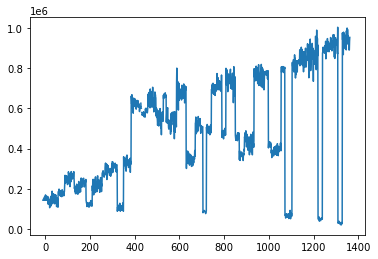

In [50]:
import matplotlib.pyplot as plt
import numpy as np
mean = np.mean(df_districts_house_prices.house_price)
print(mean)
plt.plot(df_districts_house_prices.house_price, markevery=491065, marker='^')
# plt.xlim([0, len(df_districts_house_prices)])
plt.show()

# plt.axvline(mean)
# plt.show()

# df_districts_house_prices.house_price

### 2. Combine all of the three data sources into one table to use in further analysis. 

In [3]:
n = df_person_district.merge(df_districts_house_prices)
new_table = n.merge(df_person_data)
print(new_table.shape)
new_table.dropna(inplace = True)
new_table.isna().sum()

(2014067, 10)


person_id          0
district           0
house_price        0
house_number       0
age                0
n_kids             0
n_vg               0
n_con              0
n_presub           0
n_hours_playing    0
dtype: int64

### 3. Plot age vs avg house price. What does this plot tell you? (younger people live in more expensive districts)

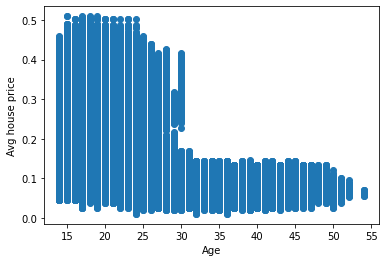

In [19]:
# new_table.columns

# sns.swarmplot(x = 'age', y = 'n_vg', data = new_table)
avg_price = new_table['house_price']/len(new_table)
new_table['avg_price'] = avg_price
plt.scatter('age', 'avg_price', data = new_table)
plt.xlabel('Age')
plt.ylabel('Avg house price')
plt.show()

## Probability and Statistics:

The goal of these questions is to test your ability to answer probability and stat questions with code.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   


### 1. What's the probability of a customer having 2 kids

In [27]:
having_two_kids = new_table[new_table.n_kids == 2]
print(having_two_kids.groupby('n_kids').size().div(len(new_table))
)
# probabilty for all kids
# print(new_table.groupby('n_kids').size().div(len(new_table)))  

n_kids
2    0.09569
dtype: float64


### 2. What's the probability of a customer owning more than 10 video games given that they have less than 2 kids

In [62]:
less_than_2_above_10_game_owing = new_table[(new_table.n_kids < 2) & (new_table.n_vg > 10)]
# # less_than_2_above_10_game_owing.shape
# # print(less_than_2_above_10_game_owing.groupby(['n_kids', 'n_vg']).size().div(len(new_table)))

# sample_space = new_table[(new_table.n_kids < 2) & (new_table.n_vg > 10)].drop_duplicates()
prob_more_10_games = new_table[new_table.n_vg > 10].groupby('n_vg').size().div(len(new_table))
prob_less_2_kids = new_table[new_table.n_kids < 2].groupby('n_kids').size().div(len(new_table))
temp = less_than_2_above_10_game_owing[new_table.n_kids < 2].groupby(['n_kids', 'n_vg']).size().div(len(new_table))

# temp = less_than_2_above_10_game_owing * prob_more_10_games
# prob_10_games_given_that_less_than_2_kids = temp.div(prob_less_2_kids)
# temp
# new_table.columns 

prob_more_10_games
prob_less_2_kids
temp
mean_prob_more_10_games = np.mean(prob_more_10_games)
mean_prob_less_2_kids = np.mean(prob_less_2_kids)
mean_less_than_2_above_10_game_owing = np.mean(temp)

prob_10_games_given_that_less_than_2_kids = (mean_less_than_2_above_10_game_owing * mean_prob_more_10_games) / mean_prob_less_2_kids
prob_10_games_given_that_less_than_2_kids


C:\Users\Dell\AppData\Local\Temp/ipykernel_5032/1234670754.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = less_than_2_above_10_game_owing[new_table.n_kids < 2].groupby(['n_kids', 'n_vg']).size().div(len(new_table))


2.9840109920766837e-05

### 3. Plot the distribution of the number of hours played by customers `n_hours_playing`. Briefly explain what you understand now about the customers' playing hours.

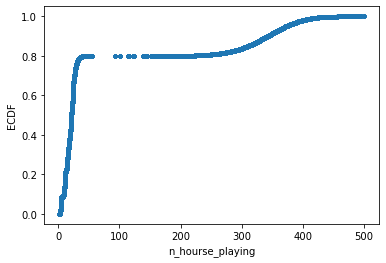

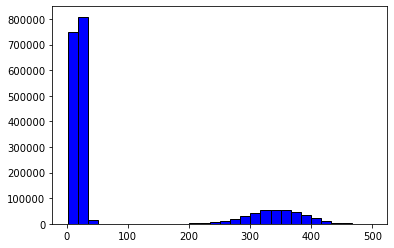

In [59]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y


# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(new_table.n_hours_playing)

# Generate plot
plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')

# Label the axes
plt.xlabel('n_hourse_playing')
plt.ylabel('ECDF')

# Display the plot
plt.show()


plt.hist('n_hours_playing', data = new_table,color = 'blue', edgecolor = 'black', bins = 30)
plt.show()


As you can see, most customers have a number of hours less than 50 so let's go ahead and remove any values less than 50.  
The distribution of the remaining values look like a normal distribution.  
###  4. Estimate the parameters (mean and std deviation) of this normal distribution computationally.  \
### (Bonus: plot the estimated normal distribution on top of the distribution of `n_hours_playing` after removing values < 50)

17.991044374294145 7.765827238837562


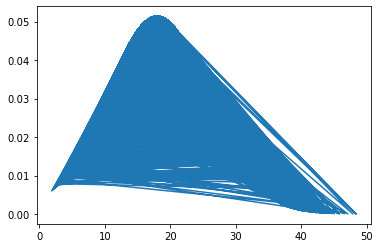

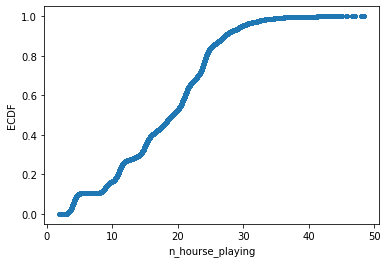

In [60]:
import numpy as np
from scipy.stats import norm
less_than_50_hours = new_table[new_table.n_hours_playing < 50]

mean = np.mean(less_than_50_hours.n_hours_playing)
std = np.std(less_than_50_hours.n_hours_playing)
print(mean, std)



plt.plot(less_than_50_hours.n_hours_playing, norm.pdf(less_than_50_hours.n_hours_playing, mean, std))
plt.show()

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(less_than_50_hours.n_hours_playing)

# Generate plot
plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')

# Label the axes
plt.xlabel('n_hourse_playing')
plt.ylabel('ECDF')

# Display the plot
plt.show()

# import seaborn as sns

# sns.displot(less_than_50_hours['n_hours_playing'])
# plt.show()

## Modeling
The goal of this is to showcase your experimentation and model comparison process.  
The performance of models is not as important as how you compare them and evaluate them against each other.  

Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   

### 1. Model the number of hours played for each customer. Show your experimentation with failed and successful models.
### 2. Evaluate each experiment using appropriate metrics, cross validation, and plots. Show the predicted vs actual plot.
### 3. Choose the best model for the data

In [101]:

from sklearn.model_selection import train_test_split
x = new_table[['age',
               'n_kids', 'n_vg', 'n_con', 'n_presub']]
y = new_table['n_hours_playing']


237.1282287734184


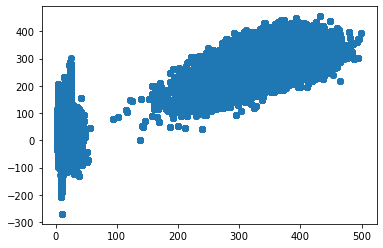

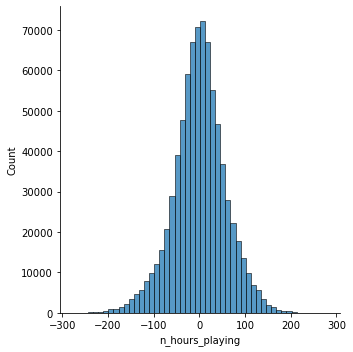

In [102]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

print(lm.intercept_)

# coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
# coeff_df
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

sns.displot((y_test-predictions),bins=50);

In [219]:
from sklearn import metrics

predictions
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 83.06869100200022
MSE: 11239.90126273525
RMSE: 106.01840058563064


788090

# Bonous MARKS ( 2 SOLD MARKS )

## Segments

### 1. The marketing team has mentioned that there exists multiple different customer segments within the data. Help the team find those different segments and separate the dataset appropriately. 

### 2. Model each segment independently to predict the number of hours played. Evaluate each model appropriately. How does your previous model for the overall data compare to the ones you created for each cluster?

In [214]:
new_table.columns
new_table.groupby(['district', 'age', 'n_kids', 'n_vg', 'n_con', 'n_presub'])
new_table



grouped = new_table.groupby(new_table.n_kids)
kids = new_table['n_kids'].unique()
n_kids = pd.DataFrame()
for i in kids:  
    n_kids = age.append(grouped.get_group(i))

print(n_kids['n_kids'].unique())



grouped2 = new_table.groupby(new_table.n_vg)
k = new_table['n_vg'].unique()
n_vg = pd.DataFrame()
for i in k:  
    n_vg = n_vg.append(grouped2.get_group(i))

# n_vg[n_vg['n_vg'] == 95]

[0 1 2 4 3 5]


In [212]:
grouped2 = new_table.groupby(new_table.age)
ag = new_table['age'].unique()
age = pd.DataFrame()
for i in ag:  
    age = n_vg.append(grouped2.get_group(i))
    
age['age']

0          14.0
2          14.0
3          14.0
4          14.0
5          14.0
           ... 
1205319    54.0
1205320    54.0
1205321    54.0
1205322    54.0
1205323    54.0
Name: age, Length: 1970251, dtype: float64

257.5460013405865
MAE: 94.90024175460682
MSE: 14241.760069274485
RMSE: 119.33884560056079


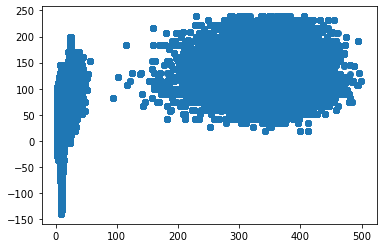

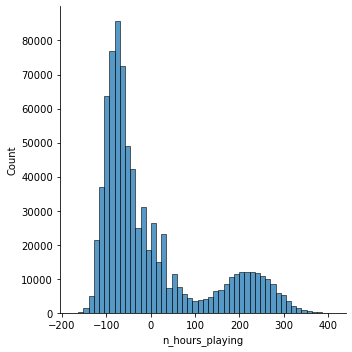

In [215]:

from sklearn.model_selection import train_test_split
x = new_table[['age',
               'n_kids']]
y = new_table['n_hours_playing']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

print(lm.intercept_)

# coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
# coeff_df
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

sns.displot((y_test-predictions),bins=50);


from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

1.0210402312306996
MAE: 83.06869100200022
MSE: 11239.90126273525
RMSE: 106.01840058563064


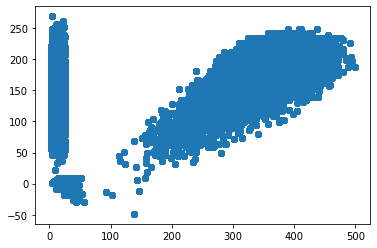

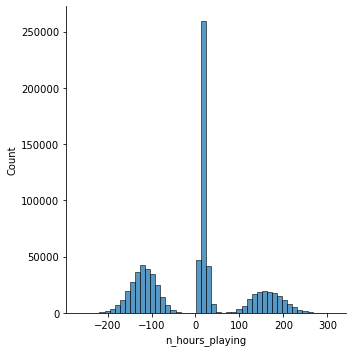

In [216]:

from sklearn.model_selection import train_test_split
x = new_table[['n_vg',
               'n_con']]
y = new_table['n_hours_playing']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

print(lm.intercept_)

# coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
# coeff_df
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

sns.displot((y_test-predictions),bins=50);


from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))